<a href="https://colab.research.google.com/github/nicholasfurl/Great-Courses/blob/main/Lesson06_BayesSpamDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
########
#we will build a spam detector using two different models, a decision tree and a naive Bayes model. 
#A naive Bayes classifier calculates the probability of a sequence of words belonging to a class as 
#proprotional to the product of the probability of each item in a sequence given the class.
#######

#I wrote up a heavily annonated version of the code where I figured out quite a lot of nonobvious stuff 
#And wrote a lot of advice and created code snippets to illustrate how everything works
#but then the colab browser windows all froze and refused to let me save and now its all gone

In [2]:
#This function will be used below. It creates a dictionary of words from some corpus
#unk means unknown
#The dictionary contains keys in the first column, which are just words taken 
#from some corpus which have mpore than one instance and an index in the second column
#There aren't any counts in terms of frequencies saved, contrary to what the lesson
#comments imply. 
#'@unknown' and '@size' are merely names of entries for unknown words and for the last index (number of words in dict)

#Note use of:
#if with open as / readlines

# read in the vocabulary file 
def readvocab(vocab_path="vocab.txt"):
   # keep track of the number of words
    lexiconsize = 0
   # initialize an empty dictionary
    word_dict = {}
   # create a feature for unknown words
    word_dict["@unk"] = lexiconsize
    lexiconsize += 1
   # read in the vocabular file
    with open(vocab_path, "r") as f:
        data = f.readlines()
   # Process the file a line at a time.
    for line in data:
        # The count is the first 3 characters
        count = int(line[0:4])
        # The word is the rest of the string
        token = line[5:-1]
       # Create a feature if it’s appeared at least twice
        if count > 1: 
            word_dict[token] = lexiconsize
            lexiconsize += 1
    # squirrel away the total size for later reference
    word_dict["@size"] = lexiconsize
    return(word_dict)

In [3]:
#Next function def takes strings from the training and test datasets 
#(which contain email messages that are spam or real)
#and returns a vector containing frequencies of words in each that are found in the dict

#Will be called by getdat

# Turn string str into a vector.
def tokenize(email_string, word_dict):
  # initially the vector is all zeros
  vec = [0 for i in range(word_dict["@size"])]
  # for each word
  for t in email_string.split(" "):
   # if the word has a feature, add one to the corresponding feature
    if t in word_dict: vec[word_dict[t]] += 1
   # otherwise, count it as an unk
    else: vec[word_dict["@unk"]] += 1
  return(vec)

In [4]:
#Takes the training and test data files, opens them, passes them to tokenise to get 
#frequencies of their words, then output these frequencies plus their labels

# read in labeled examples and turn the strings into vectors
def getdat(filename, word_dict):
    with open(filename, "r") as f:
        data = f.readlines()
    dat = []
    labs = []
    for line in data:
        labs = labs + [int(line[0])]
        dat = dat + [tokenize(line[2:], word_dict)]
    return(dat, labs)

In [5]:
#ftp over all the files from GitHub

!wget https://github.com/mlittmancs/great_courses_ml/raw/master/data/vocab.txt
!wget https://github.com/mlittmancs/great_courses_ml/raw/master/data/spam-test.csv
!wget https://github.com/mlittmancs/great_courses_ml/raw/master/data/spam-train.csv

--2023-01-02 17:07:02--  https://github.com/mlittmancs/great_courses_ml/raw/master/data/vocab.txt
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/mlittmancs/great_courses_ml/master/data/vocab.txt [following]
--2023-01-02 17:07:02--  https://raw.githubusercontent.com/mlittmancs/great_courses_ml/master/data/vocab.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 90153 (88K) [text/plain]
Saving to: ‘vocab.txt’

vocab.txt           100%[===================>]  88.04K  --.-KB/s    in 0.005s  

2023-01-02 17:07:02 (15.7 MB/s) - ‘vocab.txt’ saved [90153/90153]

--2023-01-02 17:07:02--  https://github.

In [6]:
#Now the actual work / function calls

#Create the dictionary of words from a corpus (keys) and their indices into the dict (paired data)
word_dict = readvocab()
traindat, trainlabs = getdat("spam-train.csv", word_dict)
testdat, testlabs = getdat("spam-test.csv", word_dict)

#So *dat files seem to have 2000 rows with 3233 entries. Looks like there's a frequency / count 
#for every word in the corpus so the lists are mostly zeros with a few sparse entries here and there were a word was used

#Labels are 2000 1s (spams) or 0s (reals)


In [78]:
#Just looking at the variables. Skip this

test = traindat[0]
print(len(test))

print(traindat[0:5])
trainlabs[0:5]

3233
[[2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

[0, 0, 0, 0, 0]

In [7]:
#Model time. Is this simple or what?

#Let's now fit a naive Bayes model and print the accuracy of the model

from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB().fit(traindat, trainlabs)
clf = clf.fit(traindat, trainlabs)	
yhat = clf.predict(testdat)
acc = sum([yhat[i] == testlabs[i] for i in range(len(testdat))])/len(testdat)
acc


0.985

In [81]:
#Confusion matrix function. Now that is handy!

#I guess "spam" is positive since it was a 1?

#Truth in rows (not spam, spam)
#predictions in cols (not spam, spam)

#Doesn't output marginals

from sklearn.metrics import confusion_matrix


print(confusion_matrix(testlabs, yhat))

[[1724    5]
 [  25  246]]


In [82]:
#This is just the function definition. See next block

#This next bit looks complicated but it's like logistic regression
#We have 3233 IDVs predicting one binary outcome
#Each IDV has a weight expressed in something related to log odds that gives us 
#the leverage of that IDV over the outcome.
#Each IDV is the frequency of a word and its weight is how well it predicts 1 (spam)

#I thought spam was one though? Shouldn't words in the real sentence have the negative values?
#Maybe this is expressed in negative log likelihoods?
#Doc says "Smoothed empirical log probability for each class."
#And in the code I see it subtracts log prob for 1 from log prob for zero

import numpy as np

def plotsentence(sentence, clf):
  acc = 1.0
  labs = []
  facs = []
  factor = np.exp(clf.class_log_prior_[0]- clf.class_log_prior_[1])
  labs += ["PRIOR"]
  facs += [factor]
  acc *= factor
  for w in sentence:
    i = word_dict[w]
    factor = np.exp(clf.feature_log_prob_[0][i]- clf.feature_log_prob_[1][i])
    labs += [w]
    facs += [factor]
    acc *= factor
  labs += ["POST"]
  facs += [acc]
  return((labs,facs))

In [83]:
(labs,facs) = plotsentence(['yo', 'come', 'over', 'carlos', 'will', 'be', 'here', 'soon'], clf)
facs = [ fac if fac >= 1.0 else -1/fac for fac in facs ]
[(l,round(f,1)) for (l,f) in zip(labs,facs)]

[('PRIOR', 6.5),
 ('yo', 8.0),
 ('come', 15.5),
 ('over', 1.4),
 ('carlos', 4.9),
 ('will', 1.9),
 ('be', 1.4),
 ('here', 6.7),
 ('soon', 3.4),
 ('POST', 347592.0)]

In [97]:
#Example log probabilities from words used in a real text

#what is fac? What is f? Why can't I access these variables? f was created within a function, should it be here?

#I really should look more closely at this one ....

(labs,facs) = plotsentence(['yo', 'come', 'over', 'carlos', 'will', 'be', 'here', 'soon'], clf)
print(facs)
facs = [ fac if fac >= 1.0 else -1/fac for fac in facs ]  #This seems to do nothing? What is fac?
print(facs)

#Python's zip() function creates an iterator that will aggregate elements from 
#two or more iterables. You can use the resulting iterator to quickly and consistently 
#solve common programming problems, like creating dictionaries.
#[(l,round(f,1)) for (l,f) in zip(labs,facs)]

[6.504201680672269, 7.957327736970964, 15.506587384866508, 1.4282383117640207, 4.896817068905212, 1.9128191675410962, 1.4282383117640194, 6.733123469744665, 3.3665617348723322, 347592.013851729]
[6.504201680672269, 7.957327736970964, 15.506587384866508, 1.4282383117640207, 4.896817068905212, 1.9128191675410962, 1.4282383117640194, 6.733123469744665, 3.3665617348723322, 347592.013851729]


In [98]:
(labs,facs) = plotsentence(['congratulations', 'thanks', 'to', 'a', 'good', 'friend', 'u', 'have', 'won'], clf)
facs = [ fac if fac >= 1.0 else -1/fac for fac in facs ]
[(l,round(f,1)) for (l,f) in zip(labs,facs)]

[('PRIOR', 6.5),
 ('congratulations', -11.4),
 ('thanks', -1.1),
 ('to', -1.4),
 ('a', -1.2),
 ('good', 4.7),
 ('friend', -1.3),
 ('u', 2.0),
 ('have', -1.1),
 ('won', -12.6),
 ('POST', -6.0)]

In [8]:
#Try out decision tree as basis for comparison

#accuracy for Naive Bayes was .985

#seems like no matter how many nodes I use, even 1000, it stays around .96 (not bad though!)

from sklearn import tree
import graphviz

clf = tree.DecisionTreeClassifier(max_leaf_nodes = 2)	
clf = clf.fit(traindat, trainlabs)	

yhat = clf.predict(testdat)

sum([yhat[i] == testlabs[i] for i in range(len(testdat))])/len(testdat)

0.888

In [11]:
#Does confusion matrix work with decision tree?
from sklearn.metrics import confusion_matrix

print(confusion_matrix(testlabs, yhat))

[[1659   70]
 [ 154  117]]


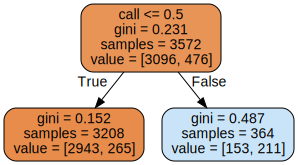

In [9]:
#I tried this with 2 nodes (i.e., one decision rule)
#and it categorised with 88% accuracy based on just whether call <=.5
#Hard to say what .5 is. Half the sentence? 

wordlist = list(word_dict.keys())[:-1]
dot_data = tree.export_graphviz(clf, feature_names=wordlist,
                      filled=True, rounded=True) 
graph = graphviz.Source(dot_data)	
graph	

In [18]:
#Not part of the exercise, but can I get a perceptron to work?

#Yes I can and already we have the same ~.9845 as naive Bayes with no hidden units  

#Two hidden layers with 100 hidden nodes each only .9865

#sigmoid function changes nothing ~.98

from sklearn.neural_network import MLPClassifier

hidden_size = [100, 100]  #I think this adds another hidden layer, although it didn't increase performance and may have decreased it slightly
#hidden_funct = 'identity'
hidden_funct = 'logistic'
#hidden_funct - 'relu'

#do the fitting
clf = MLPClassifier(hidden_layer_sizes=hidden_size, max_iter = 10000, activation = hidden_funct)
clf.fit(traindat, trainlabs)

#proportion correct
score = clf.score(testdat, testlabs)
print('proportion correct: ', score, '\n')

#confusion matrix (rows truth, cols model predictions)
yhat = clf.predict(testdat)
from sklearn.metrics import confusion_matrix
print('confusions: ', confusion_matrix(testlabs, yhat), '\n')


proportion correct:  0.9855 

confusions:  [[1720    9]
 [  20  251]] 

